#Project - Investigate medical dataset

***This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row***


Dataset


1. PatienID---Identification of a patient
2. AppointmentID---Identification number of a patient
3. Gender---Displays teh gender of the patient 
4. ScheduledDay---Displays the date on which appointmnet was scheduled
5. AppointmentDay---Shows the date of the appointment
6. Neighbourhood---Indicates the location of the hospital
7. Scholarship	---Indicated is the patient receives a scholarship
8. Hipertension--- Shows if the patient has hypertension
9. Diabetes	---Shows if the patient has diabetes
10. Alcoholism	---Indicates if the patient is an alcoholic
11. Handcap	---Indicates if the patient is handicaped
12. SMS_received	---Shows if message is sent to the patient
13. No-show	-- It says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up



#Importing all the necessary libraries

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import collections

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Reading the dataset



In [2]:
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#Analyzing the dataset

***Check dimensions of the dataframe in terms of rows and columns***


In [3]:
df.shape

(110527, 14)

Inference drawn:

* The no.of rows are 211944
* The no.of columns are 26

***Checking if the dataset has any duplicate values***




In [4]:
sum(df.duplicated())

0

Inference drawn:

* The dataset has no duplicate values

***Checking if there are any null or missing values in the dataset***

In [5]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

Inference drawn:

* The dataset has no missing values

***Displaying the columns in the dataset***

In [6]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

Inference drawn:


*   Some column names have incorrect spellings and are in the wrong format so they'll be cleaned accordingly



**Changing column names which are in incorrect format and have wrong spellings**

In [0]:
df.rename(columns={"Hipertension": "Hypertension","AppointmentID": "Appointment_id","ScheduledDay": "Scheduled_day"	,"AppointmentDay":"Appointment_day", "Handcap":"Handicap", "No-show":"No_show", "PatientId":"Patient_id"}, inplace=True)

***Checking if datatypes are in correct format***

In [8]:
df.dtypes

Patient_id         float64
Appointment_id       int64
Gender              object
Scheduled_day       object
Appointment_day     object
Age                  int64
Neighbourhood       object
Scholarship          int64
Hypertension         int64
Diabetes             int64
Alcoholism           int64
Handicap             int64
SMS_received         int64
No_show             object
dtype: object

Inference drawn:

* Scheduled_day's data type is object but to make it easy to use for the user, we can convert it in datetime format
* Appointment_day's data type is object but to make it easy to use for the user, we can convert it in datetime format

Inference drawn:

* There are no redundant values in the dataset

#Note the redundant variables and drop them



In [9]:
df.head()

,Patient_id,Appointment_id,Gender,Scheduled_day,Appointment_day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Inference drawn:

* When we analyze the dataset, we can try can observe that there are no such columns in the dataset which have only 1 unique values in them, and hence we can conclude by stating that there are no redundant variables in the dataset.

#Analysing the variables

Variable 'Patient_id'

In [10]:
df.Patient_id.unique()

array([2.98724998e+13, 5.58997777e+14, 4.26296230e+12, ...,
       7.26331493e+13, 9.96997666e+14, 1.55766317e+13])

Inference:


* The data type of an id should ideally be integer, not float.



In [0]:
df['Patient_id'] = df['Patient_id'].astype('int64')


Variable 'Gender'

In [12]:
df.Gender.unique()

array(['F', 'M'], dtype=object)

Inference -

* The column has 2 unique values for the genders, male and female in the correct format

Variable 'Scheduled_day'

In [13]:
df.Scheduled_day.unique()


array(['2016-04-29T18:38:08Z', '2016-04-29T16:08:27Z',
       '2016-04-29T16:19:04Z', ..., '2016-04-27T16:03:52Z',
       '2016-04-27T15:09:23Z', '2016-04-27T13:30:56Z'], dtype=object)

Inference -

* The date type needs to be converted to datetime format

In [0]:
df.Scheduled_day = df.Scheduled_day.apply(np.datetime64)

Variable 'Appointment_day'

In [15]:
df.Appointment_day.unique()

array(['2016-04-29T00:00:00Z', '2016-05-03T00:00:00Z',
       '2016-05-10T00:00:00Z', '2016-05-17T00:00:00Z',
       '2016-05-24T00:00:00Z', '2016-05-31T00:00:00Z',
       '2016-05-02T00:00:00Z', '2016-05-30T00:00:00Z',
       '2016-05-16T00:00:00Z', '2016-05-04T00:00:00Z',
       '2016-05-19T00:00:00Z', '2016-05-12T00:00:00Z',
       '2016-05-06T00:00:00Z', '2016-05-20T00:00:00Z',
       '2016-05-05T00:00:00Z', '2016-05-13T00:00:00Z',
       '2016-05-09T00:00:00Z', '2016-05-25T00:00:00Z',
       '2016-05-11T00:00:00Z', '2016-05-18T00:00:00Z',
       '2016-05-14T00:00:00Z', '2016-06-02T00:00:00Z',
       '2016-06-03T00:00:00Z', '2016-06-06T00:00:00Z',
       '2016-06-07T00:00:00Z', '2016-06-01T00:00:00Z',
       '2016-06-08T00:00:00Z'], dtype=object)

Inference -

* The date type needs to be converted to datetime format

In [0]:
df.Appointment_day = df.Appointment_day.apply(np.datetime64)

Variable 'Age'

In [17]:
df.Age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1])

Inference -

* The age column has negative values which is highly unlikely to happen. So we'll have to filter out the outliers.

In [0]:
df = df[(df.Age >= 0)]

Variable 'Neighbourhood'

In [19]:
df.Neighbourhood.unique()

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

Inference -

* The variable shows the neighbourhood in which hospital is located

Variable 'Scholarship'

In [20]:
df.Scholarship.unique()

array([0, 1])

Inference -

* The variable has 2 unique values which indicate if patient receives a scholarship or no in the correct data type

Variable 'Hypertension'

In [21]:
df.Hypertension.unique()

array([1, 0])

Inference -

* The variable has 2 unique values which is 1 if patient has hypertension and 0 or else in the correct data type

Variable 'Diabetes'

In [22]:
df.Diabetes.unique()

array([0, 1])

Inference -

* The variable has 2 unique values which is 1 if patient is diabetic and 0 if not in the correct data type

Variable 'Alcoholism'

In [23]:
df.Alcoholism.unique()

array([0, 1])

Inference -

* The variable has 2 unique values which is 1 if patient is alcoholic and 0 if patient is non alcoholic in correct data type

Variable 'Handicap'

In [24]:
df.Handicap.unique()

array([0, 1, 2, 3, 4])

The column has 3 unique values possibly reppresenting the number of disabilities an individual has

Variable 'SMS_received'

In [25]:
df.SMS_received.unique()

array([0, 1])

Inference -

* The variable has 2 unique values which show if patient had received a message or not in the correct data type

Variable 'No_show'

In [26]:
df.No_show.unique()

array(['No', 'Yes'], dtype=object)

Inference -

* The variable has 2 unique values displaying ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up

Adding a new column displaying the waiting period for a patient

In [0]:
df['Wait'] = (df.Appointment_day.dt.date - df.Scheduled_day.dt.date).dt.days
df= df[(df.Wait>=0)]

Adding a new column which shows the day of the appointment

In [0]:
df['appointment_day'] = df.Scheduled_day.dt.day_name()

Understanding the variable 'Appointment_Day'

In [29]:
collections.Counter(df.appointment_day)

Counter({'Friday': 18915,
         'Monday': 23084,
         'Saturday': 24,
         'Thursday': 18072,
         'Tuesday': 26167,
         'Wednesday': 24259})

By observing, very few appointments are made for the weekend, Saturday with majority of appoints being made for the former part of week on days like Monday, Tuesday, Wednesday with the number dropping in the latter part of week for days like Thursday and Friday

In [30]:
df.head(5)

,Patient_id,Appointment_id,Gender,Scheduled_day,Appointment_day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Wait,appointment_day
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,Friday
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,Friday
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,Friday
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,Friday
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,Friday


# Observations

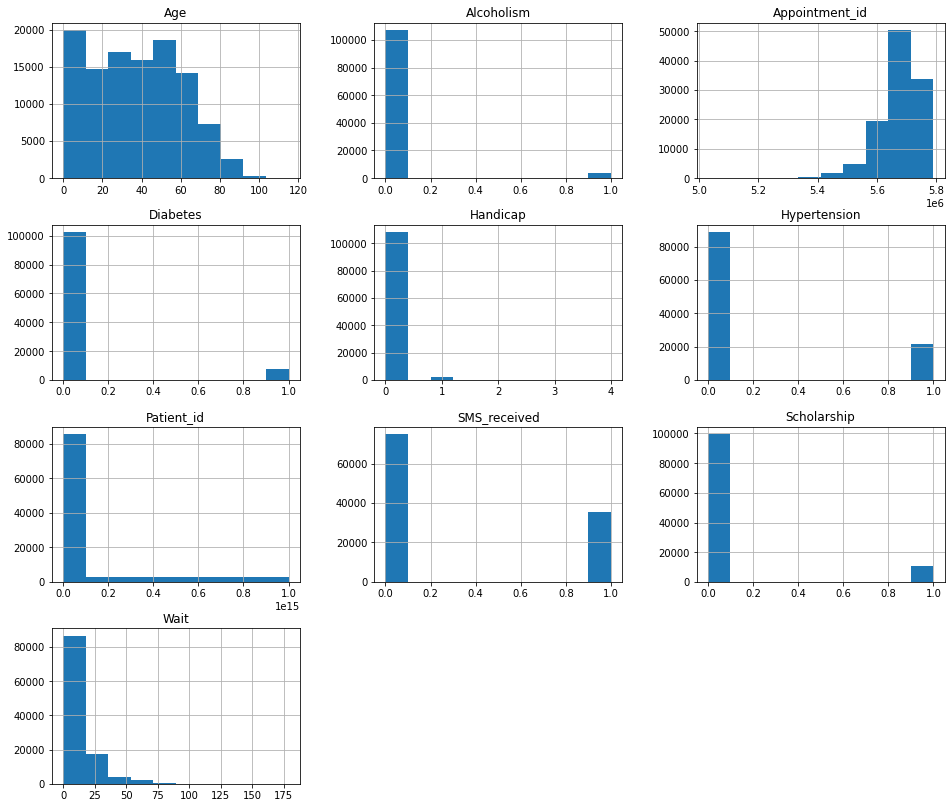

In [31]:
df.hist(figsize=(16,14));

The observations made from the histograms are:



*   Patients are evenly distributed when it comes to their age with majority of patients who are minors make an appointment
*   Majority of patients do not have alcoholism. Only a very small amount of patients have alcoholism
* Majority of patients do not have diabetes. Only a very small amount of patients have have diabetes
* Majority of patients are not handicapped. Only a very small amount of patients have some disability
* Around 75% of patients do not have Hypertension while 25% of patients do have Hypertension
* Almost 7k patients did receive a text message whereas almost 3.9k patients did not receive a text message
* Majority of patiients do not receive a scholarship with a small amount of patients receieving a scholarship
* Majority of patients do not have to wait for more than 20 days with a small amount of patients having to wait upto 75 days

**What percentage of patients missed their appointments?**

In [32]:
x= (df[['No_show']]=='Yes').sum()
y= (df[['No_show']]=='No').sum()

percent= ((x)/(x+y))*100
percent

No_show    20.189828
dtype: float64

Inference:


*   20.19% of patients misssed their appointents



**Did the gender play any role in the possibilty of a patient missing their appointment?**

In [0]:
female= df[df['Gender']=='F']
total_females= female.shape[0]
male= df[df['Gender']=='M']
total_males= male.shape[0]
females_who_did_not_attend = (female[["No_show"]]=="Yes").sum()
females_who_attended = (female[["No_show"]]=="No").sum()
males_who_did_not_attend = (male[["No_show"]]=="Yes").sum()
males_who_attended = (male[["No_show"]]=="No").sum()

The percentage of females who missed their appointments

In [34]:
(females_who_did_not_attend/total_females)*100

No_show    20.311543
dtype: float64

The percentage of females who attended their appointments

In [35]:
(females_who_attended/total_females)*100

No_show    79.688457
dtype: float64

Percentage of males who missed their appointments

In [36]:
(males_who_did_not_attend/total_males)*100

No_show    19.96381
dtype: float64

Percentage of males who attended their appointments

In [37]:
(males_who_attended/total_males)*100

No_show    80.03619
dtype: float64

Plotting a graph for better understanding

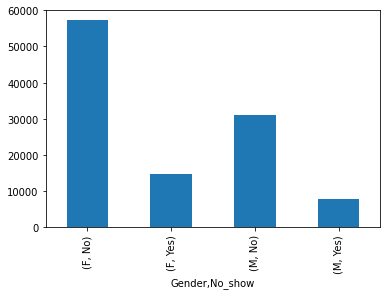

In [38]:
gender =df.groupby('Gender').No_show.value_counts()
gender.plot(kind='bar')

Inference


*   The percentage of female patients who missed their appointments is approximately equal to the number of male patients who misssed ther appointments
*   The percentage of female patients who attended their appointments is approximately equal to the number of male patients who attended ther appointments
* Thus, the gender of a person doesn't play a significant role in causing them to miss theri appointments



**Is there a relation of patient not showing up and the number of days a patient has to wait for the appointent?**

In [0]:
Waiting_df = df[['No_show', 'Wait']].groupby('Wait').count()

Plotting a graph for better understanding

Text(0, 0.5, 'Number of people')

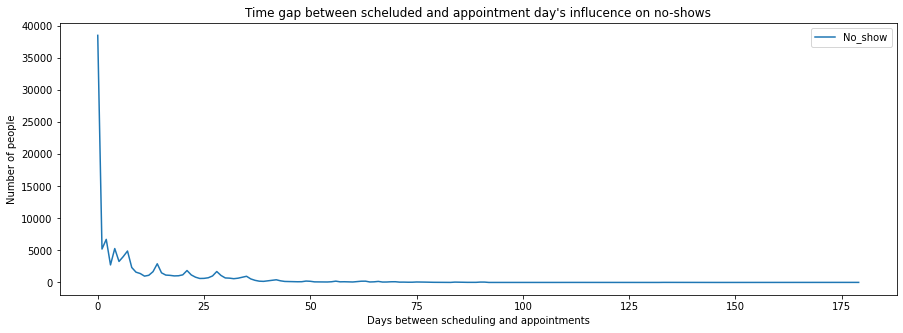

In [40]:
Waiting_df.plot(kind='line', figsize=(15,5))
plt.title("Time gap between scheluded and appointment day's influcence on no-shows")
plt.xlabel('Days between scheduling and appointments')
plt.ylabel('Number of people')

Inference:


*   Majority of patients attend their appointments if the appointments are scheduled in a small time gap, ideally on the same day



**Does the day of the appointment influence the patient's decision to attend or miss the appointent?**

In [41]:
day = df.groupby('appointment_day').No_show.value_counts()
day

appointment_day  No_show
Friday           No         15028
                 Yes         3887
Monday           No         18523
                 Yes         4561
Saturday         No            23
                 Yes            1
Thursday         No         14373
                 Yes         3699
Tuesday          No         20877
                 Yes         5290
Wednesday        No         19383
                 Yes         4876
Name: No_show, dtype: int64

Calculating the percentage 

In [42]:
percent= []
i=0
while i<len(day)-1:
  percent.append( day[i+1] *100 /(day[i]+day[i+1])  )
  i=i+2
percent

[20.54982817869416,
 19.758274129267026,
 4.166666666666667,
 20.46812749003984,
 20.21630297703214,
 20.099756791293952]

Plotting a graph for better understanding

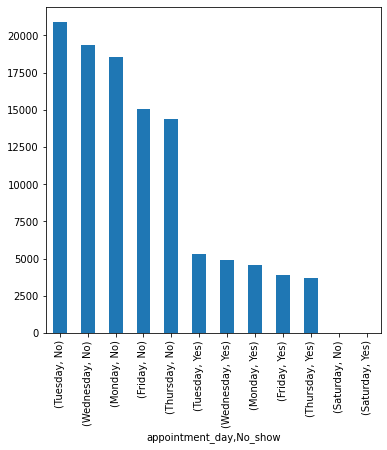

In [43]:
day = day.sort_values(ascending=False)

day.plot(kind='bar', figsize=(6,6))

Inference:
* The number of appointments scheduled, attended and missed, both are negligible
* The number of appointents , both missed and attended are maximum for Tuesday
* Wednesday comes right after Tuesday for both having the number of appointments attended as well as missed
* It is followed by Monday with a lesser number of patients attening as well as missing the appointent
* The number of patients attending as well as issing the appointment keeps on decreasing for Thursday and Friday
* Thus, the numbers of patients attending as well as missing the appointnets goes hand in hand
* Saturday is the only day when least number of patients, around 4% of those scheduled will miss their appointments
* For all the other days, around 20% of the scheduled appointents will be cancelled

**Does sending a text message influence the patient's attendance?**

In [44]:
msg= df.groupby("SMS_received").No_show.value_counts()
msg

SMS_received  No_show
0             No         62509
              Yes        12530
1             No         25698
              Yes         9784
Name: No_show, dtype: int64

Calculating the percentage 

In [45]:
Msg_not_received = msg[0][1]*100/(msg[0][0]+msg[0][1])
print(Msg_not_received)

16.697983715134797


In [46]:
Msg_received = msg[3]*100/(msg[2]+msg[3])
print(Msg_received)

27.574544839637


Plotting a graph for better understanding

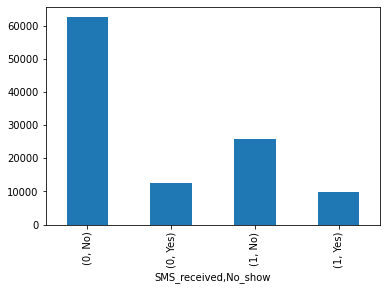

In [47]:
msg.plot(kind='bar')

Inference:
*   16% of people who did not receive the message did not show up for the appoinment
*   27% of patients did not attend the appointent in spite of getting a message
* Patients receiving text messages had a higher tendency of missing thier appointents



**Does the age of a person play any role in determining if the person will attend his appointment or not?**

Plotting a visual of patients of different ages who did not attend their respective appointments

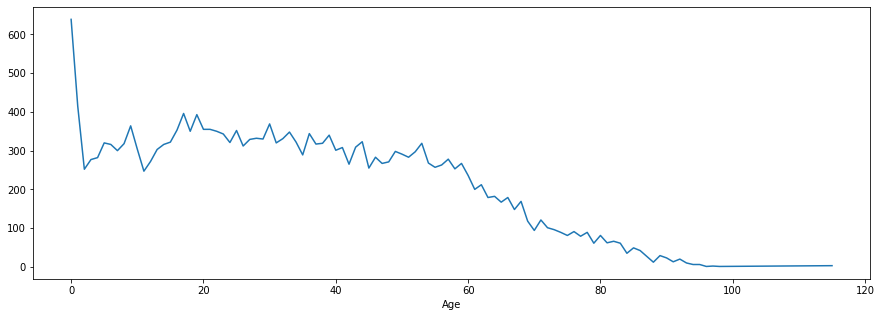

In [48]:
Age_df =df.query('No_show == "Yes"').groupby('Age').No_show.count()
Age_df.plot(kind='line', figsize=(15,5))


Plotting a visual of patients of different ages who attended their respective appointments

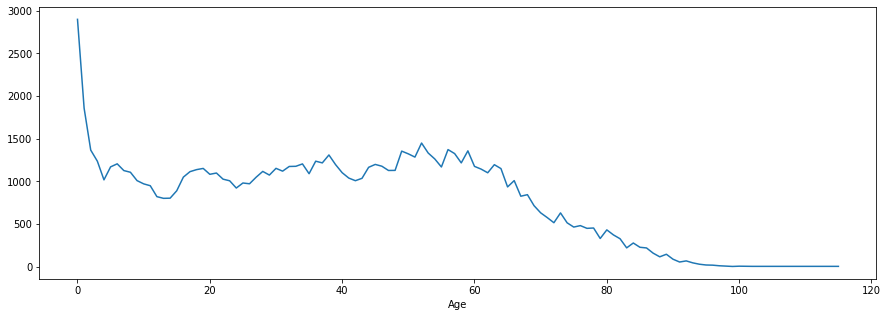

In [49]:
Age_df =df.query('No_show == "No"').groupby('Age').No_show.count()
Age_df.plot(kind='line', figsize=(15,5))


Inference:
* The number of no show appointents was the highest for infants and appears to be increasing upto the age of 20 years after which it declines
* The nmuber of appointnets where patients showed up is again, highest for infants which sharply declines after the age of 5 and almost remains contant till the age of 60 with soe rises after which it continues to decline
* There is no definite trend between age and possibility of patient showing for appointment

**Which neighbourhoods have highest numbers of no-shows?**

Neighbourhoods having most amount of No-Shows

In [50]:
area_df= df.query('No_show=="Yes"').groupby("Neighbourhood").No_show.count()
area_df.sort_values(ascending=False, inplace=True)
area_df

Neighbourhood
JARDIM CAMBURI                 1465
MARIA ORTIZ                    1219
ITARARÉ                         923
RESISTÊNCIA                     905
CENTRO                          703
                               ... 
PONTAL DE CAMBURI                12
ILHA DO BOI                       3
ILHAS OCEÂNICAS DE TRINDADE       2
ILHA DO FRADE                     2
AEROPORTO                         1
Name: No_show, Length: 80, dtype: int64

PLotting a graph  for better understanding

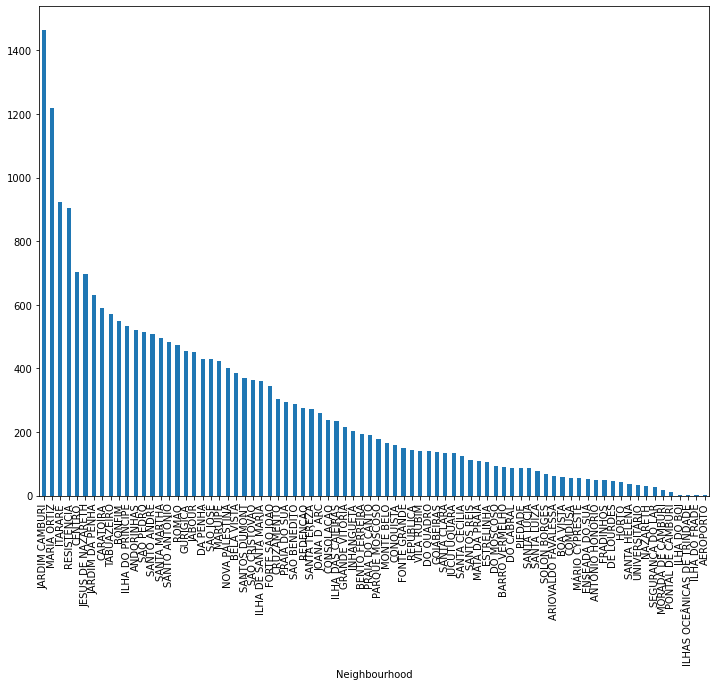

In [51]:
area_df.plot(kind='bar', figsize=(12,9))

Areas where most amount of people showed for appointment

In [52]:
area= df.query('No_show=="No"').groupby("Neighbourhood").No_show.count()
area.sort_values(ascending=False, inplace=True)
area

Neighbourhood
JARDIM CAMBURI       6252
MARIA ORTIZ          4586
RESISTÊNCIA          3525
JARDIM DA PENHA      3246
SANTA MARTHA         2635
                     ... 
PONTAL DE CAMBURI      57
ILHA DO BOI            32
ILHA DO FRADE           8
AEROPORTO               7
PARQUE INDUSTRIAL       1
Name: No_show, Length: 80, dtype: int64

PLotting a graph  for better understanding

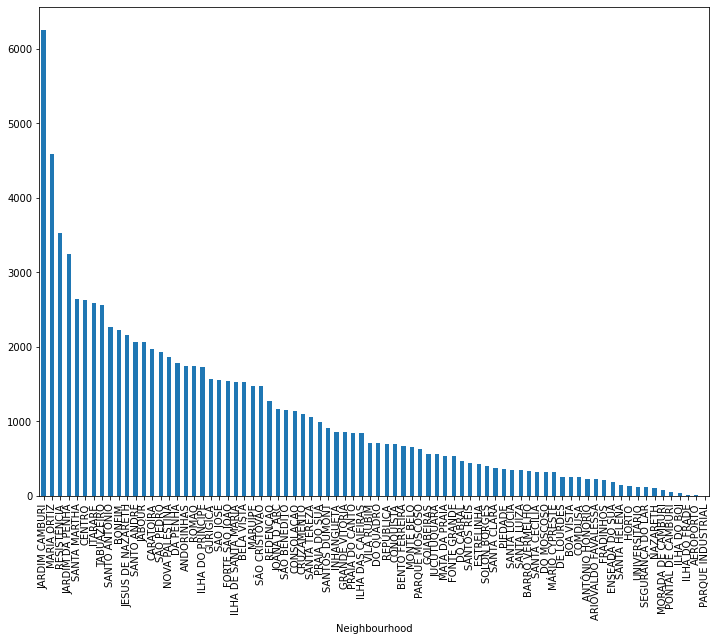

In [53]:
area.plot(kind='bar', figsize=(12,9))

The graphs clearly show that patients from certain areas are more likely to not attend their appointmets as compared to patients residing elsewhere

**Is a person have a medical issue more likely to have a no show?**

In [54]:
hypertension_data = df.groupby('Hypertension').No_show.value_counts()
diabetes_data = df.groupby('Diabetes').No_show.value_counts()
alcoholism_data = df.groupby('Alcoholism').No_show.value_counts()
hypertension_data, diabetes_data, alcoholism_data

(Hypertension  No_show
 0             No         70178
               Yes        18542
 1             No         18029
               Yes         3772
 Name: No_show, dtype: int64, Diabetes  No_show
 0         No         81694
           Yes        20884
 1         No          6513
           Yes         1430
 Name: No_show, dtype: int64, Alcoholism  No_show
 0           No         85524
             Yes        21637
 1           No          2683
             Yes          677
 Name: No_show, dtype: int64)

Plotting graphs for better understanding

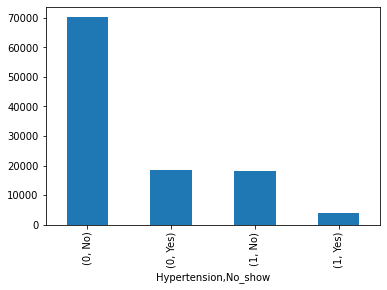

In [55]:
hypertension_data.plot(kind="bar")

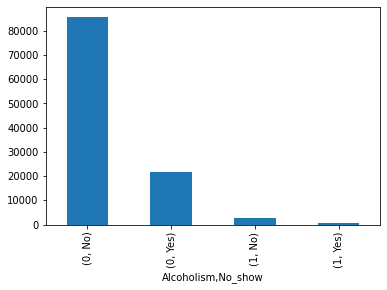

In [56]:
alcoholism_data.plot(kind='bar')

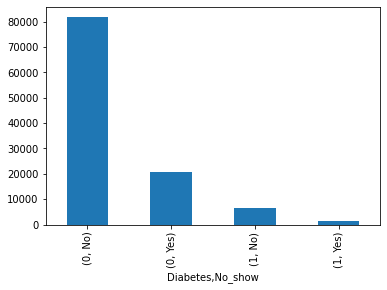

In [57]:
diabetes_data.plot(kind="bar")

Inference:


*   The percent of no shows for a patient with a medical condition is approximately equal to the percent of no shows for a patient without a pre existing medical condition


#Conclusion



*  In this project, we analyzed the no show database of patients
*  We analyzed all the variables of the dataset
*  Gender of a patient does not have influence on whether the patient shows up or no
* Whether the patient shows up or not is affected by the amount of time between the patient scheduled his appointment and his appointment
* Patient is more likely to show up if the time between the patient scheduled his appointment and his appointment is less
* The weekday on which the appointment has been scheduled does not affect the patient's behaviour except for on Saturday when percentage of patients not showing is the least
* Percentage of patients who received a text message are more likely to not show up as compared to patients who have not received a text message by a small amount
* Age of a person does not affect if the patients attends or misses his appointment
* Percentage of patient having a pre-existing medical condition like Hypertension, Diabetes, Alcoholis are as likely to miss their appointment as conpares to percentage of patients without a medical condition issing their appointments
* In some neighbourhoods, patients are more likely to miss their appointmnets as compared to other neighbourhoods

